<a href="https://colab.research.google.com/github/Rosalie324/Amazon-Cameroon/blob/main/Airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1], engine='python')

In [ ]:

# Convert the data to a numpy array and reshape it
data = np.array(data).reshape(-1, 1)

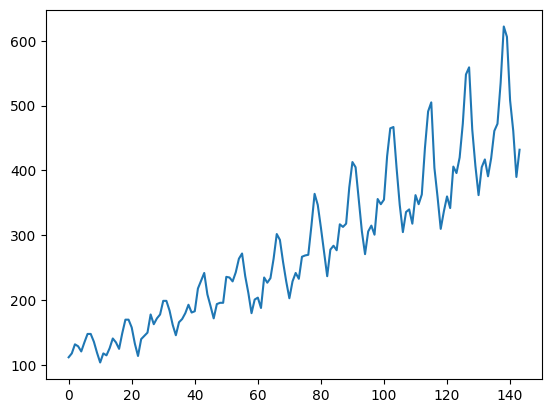

In [ ]:
# Plot the data
plt.plot(data)
plt.show()

In [ ]:

# Scale the data to the range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:

# Split the data into training and testing sets
train_size = 100
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [ ]:
# Prepare the dataset for LSTM
def create_dataset(dataset, steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-steps-1):
        a = dataset[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + steps, 0])
    return np.array(dataX), np.array(dataY)

steps = 1
trainX, trainY = create_dataset(train, steps)
testX, testY = create_dataset(test, steps)

In [ ]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 - 1s - 14ms/step - loss: 0.0535
Epoch 2/100
98/98 - 0s - 3ms/step - loss: 0.0255
Epoch 3/100
98/98 - 0s - 1ms/step - loss: 0.0186
Epoch 4/100
98/98 - 0s - 1ms/step - loss: 0.0171
Epoch 5/100
98/98 - 0s - 1ms/step - loss: 0.0158
Epoch 6/100
98/98 - 0s - 1ms/step - loss: 0.0146
Epoch 7/100
98/98 - 0s - 1ms/step - loss: 0.0134
Epoch 8/100
98/98 - 0s - 1ms/step - loss: 0.0122
Epoch 9/100
98/98 - 0s - 1ms/step - loss: 0.0111
Epoch 10/100
98/98 - 0s - 2ms/step - loss: 0.0100
Epoch 11/100
98/98 - 0s - 3ms/step - loss: 0.0089
Epoch 12/100
98/98 - 0s - 3ms/step - loss: 0.0079
Epoch 13/100
98/98 - 0s - 3ms/step - loss: 0.0069
Epoch 14/100
98/98 - 0s - 2ms/step - loss: 0.0060
Epoch 15/100
98/98 - 0s - 1ms/step - loss: 0.0053
Epoch 16/100
98/98 - 0s - 1ms/step - loss: 0.0046
Epoch 17/100
98/98 - 0s - 1ms/step - loss: 0.0040
Epoch 18/100
98/98 - 0s - 2ms/step - loss: 0.0035
Epoch 19/100
98/98 - 0s - 3ms/step - loss: 0.0032
Epoch 20/100
98/98 - 0s - 1ms/step - loss: 0.0028
Epoch 21/100
98/98 -

In [ ]:

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:

# Inverse transform the predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

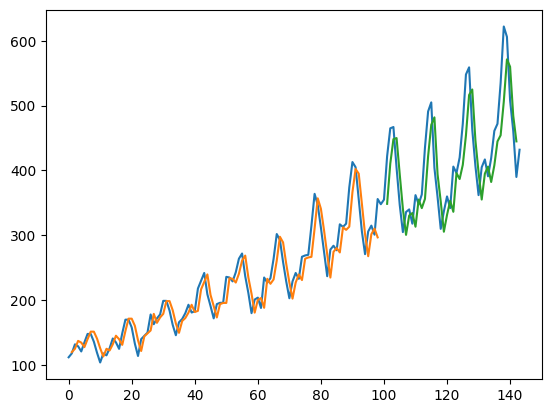

In [ ]:

# Plot the results
plt.plot(scaler.inverse_transform(data))
plt.plot(np.arange(steps, len(trainPredict)+steps), trainPredict)
plt.plot(np.arange(len(trainPredict)+(2*steps)+1, len(trainPredict)+len(testPredict)+(2*steps)+1), testPredict)
plt.show()